In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
cd drive/MyDrive/NN

/content/drive/MyDrive/NN


In [4]:
def upsample_label(temp_x, temp_y):
    y_time_list = temp_y['time'].values
    y_label = temp_y['label'].values
    jdx = 0
    label_list = []
    for index,row in temp_x.iterrows():
        try:
            if row['time'] > y_time_list[jdx]:
                jdx+=1
            label_list.append(y_label[jdx])
        except:
            label_list.append(y_label[jdx - 1])
    return label_list

In [5]:
filepath = 'TrainingData/'
column_list = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','subject', 'time', 'label']
final_df = pd.DataFrame([], columns = column_list)
for i in glob.glob(filepath + '*.csv'):
    df_type = i.split('.')[0].split('__')[1]
    file_name = i.split('/')[1].split('__')[0]
    if df_type == 'x':
        x = open(filepath + file_name + '__x.csv')
        x = pd.read_csv(x)
        x['subject'] = [file_name] * x.shape[0]
        
        x_time = open(filepath + file_name + '__x_time.csv')
        x_time = pd.read_csv(x_time)
        x['time'] = x_time
        
        y = open(filepath + file_name + '__y.csv')
        y = pd.read_csv(y)
        y['subject'] = [file_name] * y.shape[0]
        
        y_time = open(filepath + file_name + '__y_time.csv')
        y_time = pd.read_csv(y_time)
        y['time'] = y_time
        
        y.columns = ['label', 'subject', 'time']
        label_list = upsample_label(x, y)
        x['label'] = label_list
        x.columns = column_list
        final_df = pd.concat([final_df, x], ignore_index=True)


In [6]:
final_df.shape

(1341617, 9)

In [7]:
final_df.to_csv('final_dataset.csv')

In [8]:
final_df.head(20)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,subject,time,label
0,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345,subject_001_01,0.025,0
1,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159,subject_001_01,0.050,0
2,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223,subject_001_01,0.075,0
3,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111,subject_001_01,0.100,0
4,4.226515,8.273807,2.851742,0.012534,0.000445,-0.016830,subject_001_01,0.125,0
5,4.532063,8.398341,2.856682,0.014484,0.028769,-0.011091,subject_001_01,0.150,0
6,4.433669,8.294719,2.823521,0.016340,-0.029434,-0.008998,subject_001_01,0.175,0
7,4.160676,8.260676,2.827568,0.011222,-0.016748,-0.006027,subject_001_01,0.200,0
8,4.432763,8.272613,2.790050,-0.002715,0.023094,0.012222,subject_001_01,0.225,0
9,4.511362,8.256774,2.820538,-0.002248,0.001547,0.011137,subject_001_01,0.250,0


In [9]:
from scipy import stats

def create_windows(X, y, time_steps=1, step=1):
    Xs, ys = [], []
      
    for i in range(0, len(X) - time_steps + 1, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])

    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [10]:
X = final_df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']]
y = final_df['label']

TIME_STEPS = 40  # Window Size
STEP = 1

X_data, y_data = create_windows(X, y, time_steps=TIME_STEPS,step=STEP)

In [11]:
print(X.shape)
print(y.shape)

(1341617, 6)
(1341617,)


In [12]:
print(X_data.shape)
print(y_data.shape)

(1341578, 40, 6)
(1341578, 1)


In [13]:
#X_data = np.expand_dims(X_data, axis=-1)

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

df_label = pd.DataFrame(y_data, columns=['label'])
df_label['index_'] = df_label.index

## Library for performing undersampling 
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=1)
df_balanced, balanced_labels = rus.fit_resample(df_label, df_label['label'])

sos = SMOTE(sampling_strategy='not majority')
df_balanced, balanced_labels  = sos.fit_resample(df_balanced, balanced_labels)

df_balanced = pd.DataFrame(df_balanced, columns=['label', 'index_'])

X_data = X_data[df_balanced['index_'].values]
y_data = y_data[df_balanced['index_'].values]


In [15]:
print(X_data.shape)
print(y_data.shape)

(219932, 40, 6)
(219932, 1)


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.1, random_state=42)

## Converting label to OneHot Encoding
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
y_train = enc.transform(y_train)
y_val = enc.transform(y_val)
y_test = enc.transform(y_test)

In [17]:
X_train = np.asarray(X_train).astype('float32')
X_val = np.asarray(X_val).astype('float32')
X_test = np.array(X_test).astype('float32')

In [18]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed
from tensorflow.keras.layers import LSTM, LSTM, SimpleRNN, GRU, Bidirectional, Conv2D, Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

input_shape = (X_train.shape[1], X_train.shape[2], 1)
output_dim = 4
lr = 0.001

model = Sequential()
model.add(Conv2D(128, kernel_size=(6, 1), input_shape=input_shape))
model.add(Activation("relu"))

model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(6, 1)))
model.add(Activation("relu"))

model.add(Reshape((30, 6*128)))

model.add(LSTM(256, return_sequences=True))

model.add(Dropout(0.5))

model.add(LSTM(256))

model.add(Dropout(0.5))
model.add(Dense(output_dim))

model.add(Activation("softmax"))

opt = Adam(
    learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["acc"]
)

In [19]:
hist = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs=20,
    batch_size=64,
    shuffle=True
)

Epoch 1/20
2406/2406 [==============================] - 50s 15ms/step - loss: 0.2509 - acc: 0.9048 - val_loss: 0.1516 - val_acc: 0.9473
Epoch 2/20
2406/2406 [==============================] - 36s 15ms/step - loss: 0.1366 - acc: 0.9525 - val_loss: 0.1195 - val_acc: 0.9586
Epoch 3/20
2406/2406 [==============================] - 37s 15ms/step - loss: 0.1079 - acc: 0.9623 - val_loss: 0.0880 - val_acc: 0.9697
Epoch 4/20
2406/2406 [==============================] - 37s 16ms/step - loss: 0.0908 - acc: 0.9684 - val_loss: 0.0860 - val_acc: 0.9696
Epoch 5/20
2406/2406 [==============================] - 38s 16ms/step - loss: 0.0780 - acc: 0.9732 - val_loss: 0.0947 - val_acc: 0.9673
Epoch 6/20
2406/2406 [==============================] - 38s 16ms/step - loss: 0.0718 - acc: 0.9756 - val_loss: 0.0725 - val_acc: 0.9773
Epoch 7/20
2406/2406 [==============================] - 38s 16ms/step - loss: 0.0639 - acc: 0.9780 - val_loss: 0.0756 - val_acc: 0.9767
Epoch 8/20
2406/2406 [==========================

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 6, 128)        896       
                                                                 
 activation (Activation)     (None, 35, 6, 128)        0         
                                                                 
 dropout (Dropout)           (None, 35, 6, 128)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 6, 128)        98432     
                                                                 
 activation_1 (Activation)   (None, 30, 6, 128)        0         
                                                                 
 reshape (Reshape)           (None, 30, 768)           0         
                                                                 
 lstm (LSTM)                 (None, 30, 256)           1

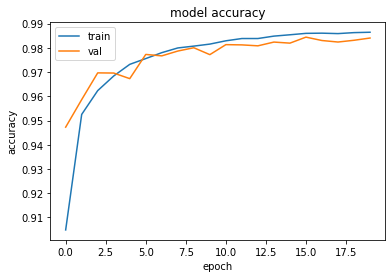

In [21]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

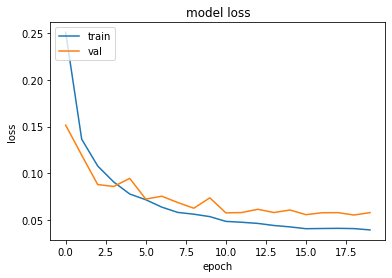

In [22]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1663
           1       0.99      1.00      1.00      1661
           2       0.99      1.00      0.99      1581
           3       0.96      0.99      0.97      1693

    accuracy                           0.98      6598
   macro avg       0.98      0.98      0.98      6598
weighted avg       0.98      0.98      0.98      6598



In [25]:
def create_test_windows(X, time_steps=1, step=1):
  Xs = []
  for i in range(0, len(X) - time_steps + 1, step):
    v = X.iloc[i:(i + time_steps)].values
    Xs.append(v)
  return np.array(Xs)

In [26]:
def test_windows(X, time_steps, step):
  Xs = []
  n_records = X.shape[0]
  remainder = (n_records - time_steps) % step
  num_windows = 1 + int((n_records - time_steps - remainder) / step)
  for k in range(num_windows):
      Xs.append(X[k*step:time_steps-1+k*step+1])
  return np.array(Xs)

In [27]:
filepath = 'TestData/'
column_list = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','subject', 'time']
columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
df_test_data = pd.DataFrame([], columns = column_list)

## Reading prediction file 
for idx in glob.glob(filepath + '*.csv'):
    df_type = idx.split('.')[0].split('__')[1]

    if df_type == 'x':
      subject_name = idx.split('.')[0].split('__')[0].split('/')[-1]
      x_path = idx.split('.')[0].split('__')[0] + '__' + df_type + '.csv'
      x_time_path = idx.split('.')[0].split('__')[0] + '__' + 'x_time' + '.csv'
      y_time_path = idx.split('.')[0].split('__')[0] + '__' + 'y_time' + '.csv'
      df_x = pd.read_csv(x_path, names=column_list[:6])
      
      print("Original number of values: ", df_x.shape)
      ## Converting windows for test data 
      sampled_test = create_test_windows(df_x[columns],TIME_STEPS, STEP)
      print("Number of windows: ", len(sampled_test))

      ## Making inference on test data 
      pred_test = model.predict(sampled_test)
      pred_test = np.argmax(pred_test, axis=1)
      pred_test = list(pred_test)
      pred_test = np.asarray(pred_test)
      pred_test = np.concatenate([pred_test, np.asarray([pred_test[-1]]*40)])
      pred_test = pd.DataFrame(pred_test, columns=['label'])

      ## Sampling the prediction to match the test set sampling frequency. 
      df_mode = pred_test['label'].rolling(window=4, min_periods=1).apply(lambda x: int(stats.mode(x)[0]))[::4]

      y_time = pd.read_csv(y_time_path, header=None).shape[0]
      print(y_time, len(df_mode.values))
    
      pred_df = pd.DataFrame(df_mode.values)
      pred_df = pred_df.astype('int64', copy=False)
      pred_df.to_csv(subject_name + '__y.csv', index=False, columns=None)

Original number of values:  (45319, 6)
Number of windows:  45280
11330 11330
Original number of values:  (51761, 6)
Number of windows:  51722
12940 12941
Original number of values:  (49081, 6)
Number of windows:  49042
12270 12271
Original number of values:  (37991, 6)
Number of windows:  37952
9498 9498
